In [1]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import re

In [2]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?query_text=fire&year=2016'
response = requests.get(endpoint)

In [3]:
response

<Response [200]>

In [4]:
response.text

'[{"month_name":"January","year":"2016","query_count":"19","query_text":"fire"}\n,{"month_name":"February","year":"2016","query_count":"35","query_text":"fire"}\n,{"month_name":"March","year":"2016","query_count":"32","query_text":"fire"}\n,{"month_name":"April","year":"2016","query_count":"26","query_text":"fire"}\n,{"month_name":"May","year":"2016","query_count":"24","query_text":"fire"}\n,{"month_name":"June","year":"2016","query_count":"31","query_text":"fire"}\n,{"month_name":"July","year":"2016","query_count":"24","query_text":"fire"}\n,{"month_name":"August","year":"2016","query_count":"47","query_text":"fire"}\n,{"month_name":"September","year":"2016","query_count":"36","query_text":"fire"}\n,{"month_name":"October","year":"2016","query_count":"38","query_text":"fire"}\n,{"month_name":"November","year":"2016","query_count":"32","query_text":"fire"}\n,{"month_name":"December","year":"2016","query_count":"38","query_text":"fire"}]\n'

In [5]:
res = response.json()
res

[{'month_name': 'January',
  'year': '2016',
  'query_count': '19',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text

# August

In [167]:
endpoint_100 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count > 100&$limit=44000'

In [168]:
response = requests.get(endpoint_100)
response

<Response [200]>

In [169]:
response.text

'[{"month_name":"March","year":"2014","query_count":"101","query_text":"permits"}\n,{"month_name":"January","year":"2015","query_count":"101","query_text":"criminal court clerk"}\n,{"month_name":"September","year":"2015","query_count":"101","query_text":"codes"}\n,{"month_name":"March","year":"2016","query_count":"101","query_text":"police"}\n,{"month_name":"March","year":"2016","query_count":"101","query_text":"civil service"}\n,{"month_name":"November","year":"2016","query_count":"101","query_text":"jobs"}\n,{"month_name":"November","year":"2017","query_count":"101","query_text":"metro holidays"}\n,{"month_name":"November","year":"2017","query_count":"101","query_text":"longevity pay"}\n,{"month_name":"January","year":"2018","query_count":"101","query_text":"West Nashville Heights Church of Christ"}\n,{"month_name":"January","year":"2018","query_count":"101","query_text":"property maps"}\n,{"month_name":"March","year":"2018","query_count":"101","query_text":"public works"}\n,{"month_

In [170]:
res100 = response.json()
res100

[{'month_name': 'March',
  'year': '2014',
  'query_count': '101',
  'query_text': 'permits'},
 {'month_name': 'January',
  'year': '2015',
  'query_count': '101',
  'query_text': 'criminal court clerk'},
 {'month_name': 'September',
  'year': '2015',
  'query_count': '101',
  'query_text': 'codes'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '101',
  'query_text': 'police'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '101',
  'query_text': 'civil service'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '101',
  'query_text': 'jobs'},
 {'month_name': 'November',
  'year': '2017',
  'query_count': '101',
  'query_text': 'metro holidays'},
 {'month_name': 'November',
  'year': '2017',
  'query_count': '101',
  'query_text': 'longevity pay'},
 {'month_name': 'January',
  'year': '2018',
  'query_count': '101',
  'query_text': 'West Nashville Heights Church of Christ'},
 {'month_name': 'January',
  'year': '2018',
  'query_count': '101',
 

In [171]:
len(res100)

1262

In [172]:
endpoint_codes = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count > 100&query_text=codes&$limit=44000'

In [173]:
response = requests.get(endpoint_codes)
response

<Response [200]>

In [174]:
response.text

'[{"month_name":"September","year":"2015","query_count":"101","query_text":"codes"}\n,{"month_name":"April","month":"4","year":"2021","query_count":"102","query_text":"codes"}\n,{"month_name":"August","year":"2016","query_count":"104","query_text":"codes"}\n,{"month_name":"November","month":"11","year":"2020","query_count":"104","query_text":"codes"}\n,{"month_name":"December","year":"2017","query_count":"106","query_text":"codes"}\n,{"month_name":"May","year":"2016","query_count":"107","query_text":"codes"}\n,{"month_name":"April","year":"2016","query_count":"111","query_text":"codes"}\n,{"month_name":"July","month":"7","year":"2021","query_count":"114","query_text":"codes"}\n,{"month_name":"January","year":"2017","query_count":"115","query_text":"codes"}\n,{"month_name":"May","month":"5","year":"2021","query_count":"115","query_text":"codes"}\n,{"month_name":"August","year":"2015","query_count":"117","query_text":"codes"}\n,{"month_name":"February","year":"2016","query_count":"121","

In [175]:
res_codes = response.json()
res_codes

[{'month_name': 'September',
  'year': '2015',
  'query_count': '101',
  'query_text': 'codes'},
 {'month_name': 'April',
  'month': '4',
  'year': '2021',
  'query_count': '102',
  'query_text': 'codes'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '104',
  'query_text': 'codes'},
 {'month_name': 'November',
  'month': '11',
  'year': '2020',
  'query_count': '104',
  'query_text': 'codes'},
 {'month_name': 'December',
  'year': '2017',
  'query_count': '106',
  'query_text': 'codes'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '107',
  'query_text': 'codes'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '111',
  'query_text': 'codes'},
 {'month_name': 'July',
  'month': '7',
  'year': '2021',
  'query_count': '114',
  'query_text': 'codes'},
 {'month_name': 'January',
  'year': '2017',
  'query_count': '115',
  'query_text': 'codes'},
 {'month_name': 'May',
  'month': '5',
  'year': '2021',
  'query_count': '115',
  'query_text': 'codes'

In [15]:
len(res_codes)

56

In [77]:
endpoint_total = 'https://data.nashville.gov/resource/fuaa-r5cm.json?query_text=maps'
response_total = requests.get(endpoint_total)

In [78]:
response_total

<Response [200]>

In [79]:
response_total.text

'[{"month_name":"January","year":"2014","query_count":"97","query_text":"maps"}\n,{"month_name":"February","year":"2014","query_count":"140","query_text":"maps"}\n,{"month_name":"March","year":"2014","query_count":"144","query_text":"maps"}\n,{"month_name":"April","year":"2014","query_count":"152","query_text":"maps"}\n,{"month_name":"May","year":"2014","query_count":"119","query_text":"maps"}\n,{"month_name":"June","year":"2014","query_count":"121","query_text":"maps"}\n,{"month_name":"July","year":"2014","query_count":"121","query_text":"maps"}\n,{"month_name":"August","year":"2014","query_count":"118","query_text":"maps"}\n,{"month_name":"September","year":"2014","query_count":"115","query_text":"maps"}\n,{"month_name":"October","year":"2014","query_count":"100","query_text":"maps"}\n,{"month_name":"November","year":"2014","query_count":"82","query_text":"maps"}\n,{"month_name":"December","year":"2014","query_count":"97","query_text":"maps"}\n,{"month_name":"January","year":"2015","

In [80]:
res_total = response_total.json()
res_total

[{'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'February',
  'year': '2014',
  'query_count': '140',
  'query_text': 'maps'},
 {'month_name': 'March',
  'year': '2014',
  'query_count': '144',
  'query_text': 'maps'},
 {'month_name': 'April',
  'year': '2014',
  'query_count': '152',
  'query_text': 'maps'},
 {'month_name': 'May',
  'year': '2014',
  'query_count': '119',
  'query_text': 'maps'},
 {'month_name': 'June',
  'year': '2014',
  'query_count': '121',
  'query_text': 'maps'},
 {'month_name': 'July',
  'year': '2014',
  'query_count': '121',
  'query_text': 'maps'},
 {'month_name': 'August',
  'year': '2014',
  'query_count': '118',
  'query_text': 'maps'},
 {'month_name': 'September',
  'year': '2014',
  'query_count': '115',
  'query_text': 'maps'},
 {'month_name': 'October',
  'year': '2014',
  'query_count': '100',
  'query_text': 'maps'},
 {'month_name': 'November',
  'year': '2014',
  'query_count': '82',
  'q

In [81]:
len(res_total)

82

In [82]:
endpoint_total_m = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$select=month_name,SUM(query_count)&query_text=maps&$group=month_name&$order=SUM(query_count) DESC'
response_total_m = requests.get(endpoint_total_m)
res_total_m = response_total_m.json()
res_total_m_df = pd.DataFrame(res_total_m)
res_total_m_df

,month_name,SUM_query_count
0,April,1309
1,June,1216
2,March,1090
3,July,1062
4,May,1019
5,August,991
6,October,981
7,September,951
8,January,924
9,February,832


In [83]:
new_sum = []
for x in res_total_m_df['SUM_query_count']:
    x = "".join(x)
    new_sum.append(x)

In [84]:
res_total_m_df['SUM_query_count']=new_sum

In [85]:
res_total_m_df

,month_name,SUM_query_count
0,April,1309
1,June,1216
2,March,1090
3,July,1062
4,May,1019
5,August,991
6,October,981
7,September,951
8,January,924
9,February,832


In [86]:
res_total_m_df['SUM_query_count'] = res_total_m_df['SUM_query_count'].astype(int)

<AxesSubplot:xlabel='month_name'>

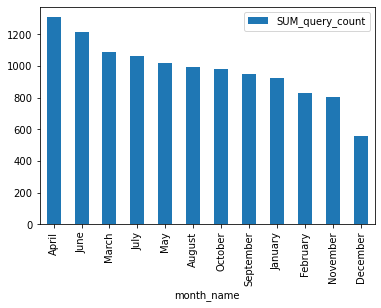

In [87]:
res_total_m_df.plot(x='month_name', y='SUM_query_count', kind='bar')

In [94]:
endpoint_hub = 'https://data.nashville.gov/resource/7qhx-rexh.json'
response_hub = requests.get(endpoint_hub)
res_hub = response_hub.json()
res_hub_df = pd.DataFrame(res_hub)
len(res_hub_df)

1000

In [93]:
endpoint_1 = 'https://data.nashville.gov/resource/fuaa-r5cm.json'
response_1 = requests.get(endpoint_1)
res_1 = response_1.json()
res_1_df = pd.DataFrame(res_1)
len(res_1_df)

1000

In [141]:
endpoint_complainers = 'https://data.nashville.gov/resource/479w-kw2x.json?$select=city, request'
response_complainers = requests.get(endpoint_complainers)
res_complainers = response_complainers.json()
res_complainers_df = pd.DataFrame(res_complainers)
res_complainers_df

,city,request
0,HERMITAGE,22-1292095
1,NaN,21-1281755
2,NASHVILLE,21-1284275
3,ANTIOCH,21-1278621
4,ANTIOCH,21-1264593
...,...,...
995,NASHVILLE,21-1264725
996,NASHVILLE,21-1279425
997,NASHVILLE,21-1258142
998,NASHVILLE,21-1267391


In [140]:
#https://data.nashville.gov/resource/qywv-8sc2.json
endpoint_police = 'https://data.nashville.gov/resource/qywv-8sc2.json?&$select=city, incident_type'
response_police = requests.get(endpoint_police)
res_police = response_police.json()
res_police_df = pd.DataFrame(res_police)
res_police_df

,city,incident_type
0,BRENTWOOD,RESIDENCE-BURGLARY ALARM
1,HERMITAGE,RESIDENCE-BURGLARY ALARM
2,JOELTON,NON-RESIDENCE-BURGLARY ALARM
3,NEELYS BEND,RESIDENCE-BURGLARY ALARM
4,HERMITAGE,NON-RESIDENCE-BURGLARY ALARM
5,SOUTH,NON-RESIDENCE-BURGLARY ALARM
6,EAST,RESIDENCE-BURGLARY ALARM
7,CENTRAL,FIGHT/ASSAULT IN PROGRESS
8,HERMITAGE,FIGHT/ASSAULT
9,HERMITAGE,RESIDENCE-BURGLARY ALARM


In [142]:
merge = pd.merge(res_complainers_df,res_police_df,how='left', on='city')

In [144]:
merge

,city,request,incident_type
0,HERMITAGE,22-1292095,RESIDENCE-BURGLARY ALARM
1,HERMITAGE,22-1292095,NON-RESIDENCE-BURGLARY ALARM
2,HERMITAGE,22-1292095,FIGHT/ASSAULT
3,HERMITAGE,22-1292095,RESIDENCE-BURGLARY ALARM
4,NaN,21-1281755,NaN
...,...,...,...
1121,NASHVILLE,21-1264725,NaN
1122,NASHVILLE,21-1279425,NaN
1123,NASHVILLE,21-1258142,NaN
1124,NASHVILLE,21-1267391,NaN


In [154]:
merge_grp = merge.groupby ('city').agg ('count').sort_values(by='request',ascending=True).reset_index ()

<AxesSubplot:ylabel='city'>

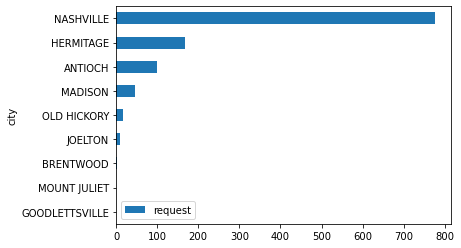

In [156]:
merge_grp.plot(x='city',y='request', kind='barh')

In [162]:
#https://data.cdc.gov/resource/8pt5-q6wp.json
endpoint_7 = 'https://data.cdc.gov/resource/8pt5-q6wp.json'
response_7 = requests.get(endpoint_7)
res_7 = response_7.json()
res_7_df = pd.DataFrame(res_7)
res_7_df

,indicator,group,state,subgroup,phase,time_period,time_period_label,time_period_start_date,time_period_end_date,value,lowci,highci,confidence_interval,quartile_range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,23.2,21.5,25,21.5 - 25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Symptoms of Anxiety Disorder or Depressive Dis...,By Education,United States,Less than a high school diploma,1,5,"May 28 - June 2, 2020",2020-05-28T00:00:00.000,2020-06-02T00:00:00.000,43.9,40.4,47.5,40.4 - 47.5,NaN
996,Symptoms of Anxiety Disorder or Depressive Dis...,By Education,United States,High school diploma or GED,1,5,"May 28 - June 2, 2020",2020-05-28T00:00:00.000,2020-06-02T00:00:00.000,36.7,35.1,38.3,35.1 - 38.3,NaN
997,Symptoms of Anxiety Disorder or Depressive Dis...,By Education,United States,Some college/Associate's degree,1,5,"May 28 - June 2, 2020",2020-05-28T00:00:00.000,2020-06-02T00:00:00.000,38.3,37.2,39.4,37.2 - 39.4,NaN
998,Symptoms of Anxiety Disorder or Depressive Dis...,By Education,United States,Bachelor's degree or higher,1,5,"May 28 - June 2, 2020",2020-05-28T00:00:00.000,2020-06-02T00:00:00.000,29.4,28.5,30.3,28.5 - 30.3,NaN


In [161]:
endpoint_7_TN = 'https://data.cdc.gov/resource/8pt5-q6wp.json?state=Tennessee'
response_7_TN = requests.get(endpoint_7_TN)
res_7_TN = response_7.json()
res_7_TN_df = pd.DataFrame(res_7_TN)
res_7_TN_df

,indicator,group,state,subgroup,phase,time_period,time_period_label,time_period_start_date,time_period_end_date,value,lowci,highci,confidence_interval,quartile_range
0,Symptoms of Depressive Disorder,By State,Tennessee,Tennessee,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,22.2,17.2,27.8,17.2 - 27.8,22.2 - 24.0
1,Symptoms of Anxiety Disorder,By State,Tennessee,Tennessee,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,28.2,22.8,34,22.8 - 34.0,27.9 - 30.3
2,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Tennessee,Tennessee,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,33.4,28,39.3,28.0 - 39.3,33.4 - 34.7
3,Symptoms of Depressive Disorder,By State,Tennessee,Tennessee,1,2,"May 7 - May 12, 2020",2020-05-07T00:00:00.000,2020-05-12T00:00:00.000,21.7,15.2,29.5,15.2 - 29.5,20.7 - 23.0
4,Symptoms of Anxiety Disorder,By State,Tennessee,Tennessee,1,2,"May 7 - May 12, 2020",2020-05-07T00:00:00.000,2020-05-12T00:00:00.000,29.6,23.4,36.5,23.4 - 36.5,28.8 - 31.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Symptoms of Anxiety Disorder,By State,Tennessee,Tennessee,3.4,43,"Mar 2 - Mar 14, 2022",2022-03-02T00:00:00.000,2022-03-14T00:00:00.000,24.3,21,27.8,21.0 - 27.8,20.7-24.4
128,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Tennessee,Tennessee,3.4,43,"Mar 2 - Mar 14, 2022",2022-03-02T00:00:00.000,2022-03-14T00:00:00.000,29.7,25.9,33.7,25.9 - 33.7,28.8-29.9
129,Symptoms of Depressive Disorder,By State,Tennessee,Tennessee,3.4,44,"Mar 30 - Apr 11, 2022",2022-03-30T00:00:00.000,2022-04-11T00:00:00.000,19.9,15.4,25.1,15.4 - 25.1,16.0-19.9
130,Symptoms of Anxiety Disorder,By State,Tennessee,Tennessee,3.4,44,"Mar 30 - Apr 11, 2022",2022-03-30T00:00:00.000,2022-04-11T00:00:00.000,27.7,22.5,33.3,22.5 - 33.3,26.5-28.6


In [164]:
endpoint_8 = 'https://data.cdc.gov/resource/yni7-er2q.json?state=Tennessee'
response_8 = requests.get(endpoint_8)
res_8 = response_8.json()
res_8_df = pd.DataFrame(res_8)
res_8_df

,indicator,group,state,subgroup,phase,time_period,time_period_label,time_period_start_date,time_period_end_date,value,lowci,highci,confidence_interval,quartile_range
0,Took Prescription Medication for Mental Health...,By State,Tennessee,Tennessee,2,13,"Aug 19 - Aug 31, 2020",2020-08-19T00:00:00.000,2020-08-31T00:00:00.000,21.2,18.4,24.1,18.4 - 24.1,20.6-22.5
1,"Received Counseling or Therapy, Last 4 Weeks",By State,Tennessee,Tennessee,2,13,"Aug 19 - Aug 31, 2020",2020-08-19T00:00:00.000,2020-08-31T00:00:00.000,8.2,6.5,10.2,6.5 - 10.2,7.2-8.7
2,Took Prescription Medication for Mental Health...,By State,Tennessee,Tennessee,2,13,"Aug 19 - Aug 31, 2020",2020-08-19T00:00:00.000,2020-08-31T00:00:00.000,24,21.1,27.1,21.1 - 27.1,23.6-25.3
3,Needed Counseling or Therapy But Did Not Get I...,By State,Tennessee,Tennessee,2,13,"Aug 19 - Aug 31, 2020",2020-08-19T00:00:00.000,2020-08-31T00:00:00.000,8.9,7.3,10.8,7.3 - 10.8,7.8-9.1
4,Took Prescription Medication for Mental Health...,By State,Tennessee,Tennessee,2,14,"Sep 2 - Sep 14, 2020",2020-09-02T00:00:00.000,2020-09-14T00:00:00.000,19.4,17,22,17.0 - 22.0,18.9-21.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Needed Counseling or Therapy But Did Not Get I...,By State,Tennessee,Tennessee,3.4,43,"Mar 2 - Mar 14, 2022",2022-03-02T00:00:00.000,2022-03-14T00:00:00.000,12.1,9.6,15,9.6 - 15.0,11.6-12.7
124,Took Prescription Medication for Mental Health...,By State,Tennessee,Tennessee,3.4,44,"Mar 30 - Apr 11, 2022",2022-03-30T00:00:00.000,2022-04-11T00:00:00.000,27.2,21.6,33.5,21.6 - 33.5,24.4-27.2
125,"Received Counseling or Therapy, Last 4 Weeks",By State,Tennessee,Tennessee,3.4,44,"Mar 30 - Apr 11, 2022",2022-03-30T00:00:00.000,2022-04-11T00:00:00.000,10.2,7.2,13.8,7.2 - 13.8,10.0-11.2
126,Took Prescription Medication for Mental Health...,By State,Tennessee,Tennessee,3.4,44,"Mar 30 - Apr 11, 2022",2022-03-30T00:00:00.000,2022-04-11T00:00:00.000,28.8,23.1,35.1,23.1 - 35.1,28.6-30.6
